#### Carregando a base de dados

In [1]:
import pickle

with open(r'../_Material/Bases de dados/Bases pre-processadas/base_credit_data.pkl', mode = 'rb') as arquivo:
    x_previsores_treinamento, y_classes_treinamento, x_previsores_teste, y_classes_teste = pickle.load( arquivo )

#### Aplicação do aprendizado

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
# Criando 40 árvores usando a equação de entropia e definindo que o resultado deve ser o mesmo em qualquer execução do código
random_forest = RandomForestClassifier( n_estimators = 40, criterion='entropy', random_state = 0 )

In [11]:
# Realizando o treinamento
random_forest.fit( x_previsores_treinamento, y_classes_treinamento )

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

#### Visualizando resultados do modelo

In [12]:
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from matplotlib.pyplot import xlabel, ylabel

In [13]:
previsao = random_forest.predict( x_previsores_teste )

In [14]:
print( 'Precisão do modelo: ', accuracy_score( y_classes_teste, previsao ) * 100, '%')

Precisão do modelo:  98.4 %


#### Explicação do resultado

Nesta matriz, os valores são provenientes do cruzamento entre as previsões e os valores reais do conjunto de dados. Sendo assim, pode-se chegar à seguinte conclusão:


**Para a classe "0", 432 previsões estão corretas e 4 estão incorretas.**

<br>

**Para a classe "1", 52 previsões estão corretas e 12 estão incorretas.**

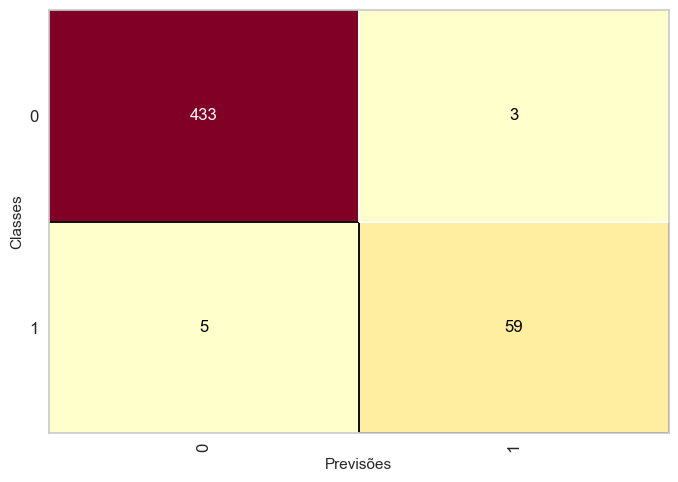

In [15]:
cm = ConfusionMatrix( random_forest )
cm.fit( x_previsores_treinamento, y_classes_treinamento )
cm.score( x_previsores_teste, y_classes_teste )

xlabel('Previsões');
ylabel('Classes');

#### Gerando relatório de classificação

In [16]:
print(classification_report( y_classes_teste, previsao ))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500

